# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 3: Regresión

__Número de grupo: 2__

__Nombres de los estudiantes: Mario Jiménez, Alejandro Ramírez y David Seijas__

En este notebook trabajaremos con una colección de datos de alquileres de Airbnb en Amsterdam. El objetivo de este problema es entrenar una red neuronal capaz de predecir el precio del alojamiento a partir de un conjunto de características.

## 1) Descripción de los datos

Carga el fichero de datos `airbnb.csv` en un dataframe. Describe el conjunto de datos y trata de interpretar el significado de cada una de las variables. Estudia la distribución de precios.

In [1]:
RANDOM_STATE=333

In [2]:
import pandas as pd
filename = "airbnb.csv"

df = pd.read_csv(filename)
df = df.dropna()

df

,accommodates,bathrooms,bedrooms,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,distance_centre,instant_bookable,entire_home,private_room,shared_room,price
0,4,2.0,2.0,1,1.0,52.358466,4.933843,2,8,3.279483,0,1,0,0,160.0
1,4,1.0,2.0,2,1.0,52.363589,4.983353,3,0,5.951843,0,1,0,0,120.0
2,2,1.0,1.0,1,1.0,52.375209,4.861647,3,8,2.601055,0,1,0,0,99.0
3,2,1.0,1.0,1,1.0,52.387382,4.890457,2,41,1.095138,0,0,1,0,100.0
4,2,1.0,1.0,1,1.0,52.384062,4.889877,3,0,0.844491,0,1,0,0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,43.0,52.382970,4.873389,3,10,1.815773,0,1,0,0,140.0
14994,4,1.0,2.0,1,1.0,52.347479,4.833644,4,2,5.687407,1,1,0,0,120.0
14995,2,1.0,1.0,1,1.0,52.370400,4.918489,1,5,1.620395,0,1,0,0,120.0
14996,3,1.0,1.0,1,1.0,52.389637,4.879580,2,7,1.777881,0,1,0,0,95.0


Hay 14998 pisos registrados, cada uno con 15 variables anotadas.

#### Variables:
1. accomodates: nº de huéspedes en el alojamiento.
2. bathrooms: baños.
3. bedrooms: habitaciones.
4. guests_included: invitados permitidos.
5. host_listings_count: lista de huéspedes que han pasado por el alojamiento.
6. latitude: latitud de su ubicación.
7. longitude: longitud de su ubicación.
8. minimum_nights: mínimo de noches que debe pasar el huesped.
9. number_of_reviews: nº de críticas recibidas (positivas o negativas).
10. distance_centre: distancia al centro de Amsterdam en km
11. instant_bookable: si actualmente se puede alquilar o no.
12. entire_home: si el huesped dispone de toda la casa.
13. private_room: contrario de entire_home.
14. shared_room: si tiene zonas comunes
15. price: precio por noche

In [3]:
df2 = df['price']
df2.describe() #saca las variables

count    14998.000000
mean       130.050273
std         63.820328
min         19.000000
25%         89.000000
50%        115.000000
75%        150.000000
max        440.000000
Name: price, dtype: float64

#### OBSERVACIONES
La media es de 130 euros por noche, con una desviación típica de 63. Es decir, la media no es del todo exacta, y la mayoría de los alojamientos tienen un precio de entre [70,180]. Aun así, existen ofertas mucho más modestas, como el mínimo de 19, que puede ser un albergue. También existen ofertas para clientes con un alto poder adquisitivo.

## 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga el precio y, además, las variables que estén relacionadas con él por un valor de correlacción de al menos 0.2 (de forma directa o inversa).

In [7]:
correl=df.corr()
df3 = correl[abs(correl['price']) > 0.2]['price']

dfaux = df.loc[:, df3.index]
dfaux

,accommodates,bathrooms,bedrooms,guests_included,distance_centre,entire_home,private_room,price
0,4,2.0,2.0,1,3.279483,1,0,160.0
1,4,1.0,2.0,2,5.951843,1,0,120.0
2,2,1.0,1.0,1,2.601055,1,0,99.0
3,2,1.0,1.0,1,1.095138,0,1,100.0
4,2,1.0,1.0,1,0.844491,1,0,175.0
...,...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,1.815773,1,0,140.0
14994,4,1.0,2.0,1,5.687407,1,0,120.0
14995,2,1.0,1.0,1,1.620395,1,0,120.0
14996,3,1.0,1.0,1,1.777881,1,0,95.0


## 3) Normalización

Decide si debes o no normalizar los datos. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.

Si decides escalar los datos deberás crear dos `scalers` distintos, uno para el array con la descripción de los pisos y otro para el array con el precio. Lo hacemos de este modo porque así podremos desescalar las predicciones más fácilmente.

#### DECISIÓN
En primer lugar, es necesario escalar los datos puesto que la convergencia se dará mucho más rápido y el algoritmo será más eficaz.

Por otro lado, hemos decidido escalarlos (con MinMax) ya que las distribuciones no se asemejan mucho a una normal.

In [10]:
df1 = dfaux.drop(['price'], axis=1) #valores de entrada
df2 = dfaux['price'] #valores de salida

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Transformamos las variables de entrada
scaler_x = MinMaxScaler()
scaler_x.fit(df1.values)
df1_scaled=scaler_x.transform(df1.values)

# Y también transformamos la variable de salida
scaler_y = MinMaxScaler()
scaler_y.fit(df2.values.reshape(-1, 1)) # Como es una sola variable es necesario ponerlo en modo columna
target_scaled=scaler_y.transform(df2.values.reshape(-1, 1))

In [13]:
df1_scaled

array([[0.1875    , 0.25      , 0.2       , ..., 0.26979228, 1.        ,
        0.        ],
       [0.1875    , 0.125     , 0.2       , ..., 0.49768568, 1.        ,
        0.        ],
       [0.0625    , 0.125     , 0.1       , ..., 0.2119373 , 1.        ,
        0.        ],
       ...,
       [0.0625    , 0.125     , 0.1       , ..., 0.12830863, 1.        ,
        0.        ],
       [0.125     , 0.125     , 0.1       , ..., 0.14173871, 1.        ,
        0.        ],
       [0.0625    , 0.125     , 0.1       , ..., 0.21353482, 1.        ,
        0.        ]])

In [14]:
target_scaled

array([[0.33491686],
       [0.23990499],
       [0.19002375],
       ...,
       [0.23990499],
       [0.18052257],
       [0.23990499]])

## 4) Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 200 neuronas
- La segunda con dos capas ocultas cada una de 100 neuronas

Pinta la curva de aprendizaje para cada red variando el parámetro `alpha` que controla el coeficiente de regularización L2 y determina el valor óptimo usando validación cruzada. Asegúrate de que no salen warnings indicando que no se ha alcanzado la convergencia durante el entrenamiento (basta con poner un número de max_iter suficientemente grande).

¿Alguna de las dos redes domina a la otra? ¿Por qué crees que se producen las diferencias?

Una capa oculta de 200 neurona

In [19]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=100, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, df1_scaled, target_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.012678058326870708,
  -0.012226656573093376,
  -0.01227486731648672,
  -0.01225004077782114,
  -0.012243364484804887,
  -0.012228302978063621],
 [0.0003966419209094001,
  0.00027398866706305716,
  0.00020223707355082873,
  0.00020722075014518695,
  0.0002049348239465782,
  0.00021794733926554157])

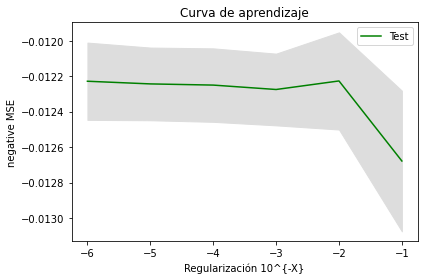

In [20]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### OBSERVACIONES
Parece que el mejor valor es $\alpha=10^{-2}$, porque con -1 es muy mala y el resto es más o menos estable, con valores próximos. Aun así, el 2 sigue siendo la mejor.

Dos capas ocultas de 100 neuronas

In [17]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(100,100), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, df1_scaled, target_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.012723697054611205,
  -0.011979667476459645,
  -0.011740184971338063,
  -0.011704574246138705,
  -0.01169437301714911,
  -0.01175465244045318],
 [0.0003885895981672428,
  0.0003546605235645444,
  0.0004269019094578842,
  0.00044308683145133766,
  0.00043602684046625774,
  0.00045943793468267077])

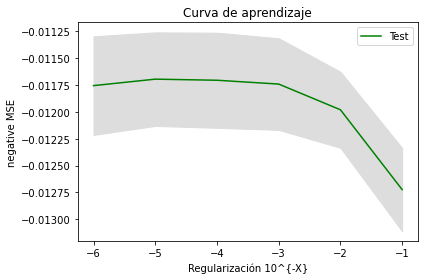

In [18]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

#### OBSERVACIONES
En este caso, el coeficiente de regularización que más nos conviene es $\alpha=10^{-5}$. Sin embargo, también podemos escoger -4 o -3, pues prácticamente es lo mismo.

#### PREGUNTAS
1. La de dos capas de 100 domina a la otra, pues se observa que el error es menor (en valor absoluto), es decir, la gráfica está por encima de la de 200.
2. 

## 5) Medición del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción del valor de todos los establecimientos usando validación cruzada. ¿Cuál es el error medio del modelo en euros? ¿Crees que el modelo es suficientemente bueno?

Pinta la distribución del error en euros y el diagrama de dispersión de la predicción frente al valor real. ¿El modelo comete los mismos tipos de errores en establecimientos de distintos precios? ¿Por qué crees que se producen esos errores?

In [30]:
from sklearn.model_selection import cross_val_predict

# Creamos el clasificador
regul_param=0.00001
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
# estimamos 
predicts_scaled = cross_val_predict(mlp, df1_scaled, target_scaled.ravel(), cv=10)

# desescalamos las predicciones para que estén en la escala original
predicts=scaler_y.inverse_transform(predicts_scaled.reshape(-1, 1))

In [31]:
errors = np.abs(df2.values.reshape(-1, 1) - predicts) # error en cada ejemplo
mean_error = np.mean(errors)
std_error = np.std(errors)
mean_price = np.mean(df2.values)

print('Error medio: ', mean_error)
print('Desviación típica: ', std_error)
print('Error medio en %: ', mean_error/mean_price*100)

Error medio:  32.47756760358373
Desviación típica:  32.239384552463
Error medio en %:  24.97308676256111


#### OBSERVACIONES
1. El error medio es de 32.47 euros aproximadamente.
2. El modelo es normalito, pues el error medio no es muy elevado. Sin embargo, es bastante mejorable, pues el porcentaje de error es del 25%. Creemos que incluyendo otras variables en el modelo, como las fechas en la que se alquilan (los precios varían en cada estación por la demanda) o si está bien conectado mediante transporte público. 

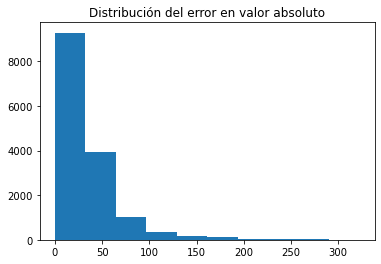

In [27]:
# Dibujamos el histograma de los errores
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(errors)

plt.title('Distribución del error en valor absoluto')
plt.show()

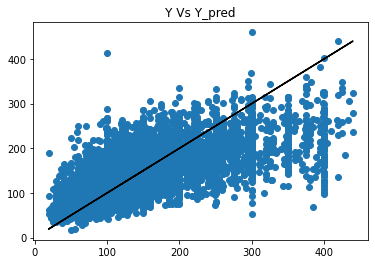

In [32]:
fig2 = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(df2, predicts) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(df2, df2, color='k') 

plt.title('Y Vs Y_pred')
plt.show()

#### OBSERVACIONES
1. Para pisos de valores muy altos suele predecir precios mucho menores. Esto significa que a la hora de ir a alquilarlo, nos podemos llevar una desagradable sorpresita.
2. Para pisos con precios más bajos las predicciones tampoco mejoran mucho. Por ejemplo, para pisos de 100 euros la noche existen predicciones cercanas a los 200, 300 e incluso una de 400.
3. 
4. Por lo tanto, concluimos que el modelo no es muy preciso. En nuestro caso, creemos que no lo utilizaríamos para predecir el precio de un alquiler.